#  **Project: Capstone Project 2– v5**

**Project name:** - Citi Bike– Repricing case study and Twitter Sentiment analysis for real time reputation management

**Student Name:** - Jitendra Agarwal

**Course:** - Springboard cohort Jan2 2018

**Summary:** - 	Citi Bike is the largest bike share program in us, with 10,000 bikes and 600 stations across 
Manhattan, Brooklyn, Queens and Jersey City. It was designed for quick trips with convenience in mind, and it’s a fun and affordable way to get around town. Everyone knows that bike sharing is the answer to many environmental and urban transportation issues, yet it’s not mainstream in US. 
I am being asked by the senior executive team at Citi bike to use data science techniques to recommend 3 key action item to increase the company’s’ business. 

**Problem Statement: - **
    • Citi bike management is curious to know if there is any statistical way to find the reason in decline in trips observed few times last quarter. 
    • How are user sentiments about a recent change in pricing and if Citi bike is really useful for users from time, cost and efficiency point of view compared to other transportation options? 
    • How is the performance of unit economics per trip or per bike or per station? o What is the most common use of Citi bike? 
    • What measure can be taken to increase user trips by 5% with existing users. 

**Project Goals: ** -
    • User Sentiment analysis from twitter and identify most common customer issues and how to address them. 
    • Analyze if any of the current plan can be repriced to get 5% increase on revenue with no customer impact. 
    • Can we predict a right number of bike to stationed as a station? o Propose a new monthly pass pricing for office commuters.

# ** Pre Processing and Data Wrangling

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
import statsmodels.api as sm

from mpl_toolkits.axes_grid1 import make_axes_locatable
from numpy import math 
from math import sin, cos, sqrt, atan2
from statsmodels.formula.api import ols
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from scipy.stats import probplot, shapiro
from statsmodels.graphics.regressionplots import *
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, ExtraTreesRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split


sns.set()


/Users/jitendra_agarwal/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Linear Regression Model:-

In [2]:
df_daily_trips = pd.DataFrame(pd.read_csv('../data/df_daily_trips_ML.csv'))
df_daily_trips.head()

,Unnamed: 0,start_id,startdate,total_trip_time,no_of_bikes,no_of_trips,paidunits,free_trip,start_day,median_user_age,paidamount,gender,density_score,AVGT,Members
0,0,72,2017-10-01,105707,98,100,1.0,99,6,35.0,2.5,1.0,473,61.0,246193
1,1,72,2017-10-02,120738,125,131,2.0,130,0,38.0,5.0,1.0,473,65.0,246402
2,2,72,2017-10-03,128572,135,140,3.0,139,1,36.0,7.5,1.0,473,65.0,246566
3,3,72,2017-10-04,146306,152,159,0.0,159,2,36.0,0.0,1.0,473,66.5,246742
4,4,72,2017-10-05,148665,160,162,8.0,160,3,36.5,20.0,1.0,473,75.0,246893


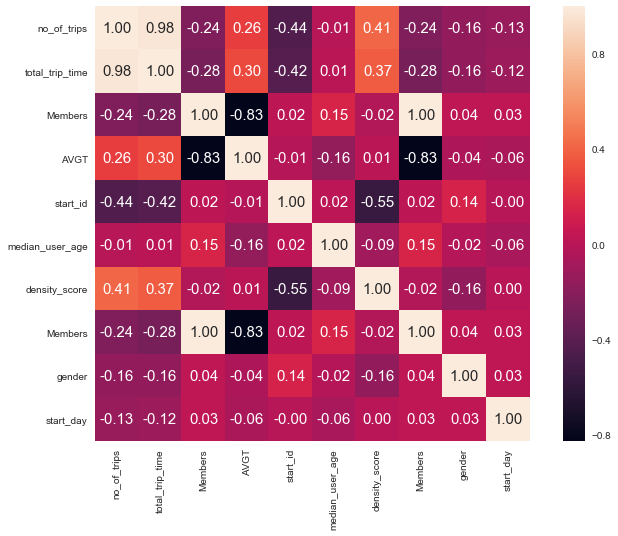

In [3]:
plt.figure(figsize=(12,8))
cols=['no_of_trips','total_trip_time','Members','AVGT','start_id','median_user_age','density_score','Members','gender','start_day']
cm = np.corrcoef(df_daily_trips[cols].values.T)
sns.set(font_scale=1)
hm = sns.heatmap(cm,
                cbar=True,
                annot=True,
                square=True,
                fmt='.2f',
                annot_kws={'size':15},
                yticklabels=cols,
                xticklabels=cols)
plt.show()


In [4]:
# Creatting the Ordinary least squares (ols) model 
# ols model to predict total trip time from a station for a given day

model1 = ols('total_trip_time ~ Members + AVGT + start_id + median_user_age + density_score + Members + gender + start_day -1 ', df_daily_trips).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:        total_trip_time   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                 1.400e+04
Date:                Sun, 18 Feb 2018   Prob (F-statistic):               0.00
Time:                        18:26:45   Log-Likelihood:            -7.8931e+05
No. Observations:               65730   AIC:                         1.579e+06
Df Residuals:                   65723   BIC:                         1.579e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Members            -0.1257      0.008    -

In [5]:
#ols model to predict no of trips from a station for a given day

model2 = ols('no_of_trips ~  start_id + median_user_age + density_score + AVGT + Members + gender + start_day -1 ', df_daily_trips).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:            no_of_trips   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                 1.439e+04
Date:                Sun, 18 Feb 2018   Prob (F-statistic):               0.00
Time:                        18:26:45   Log-Likelihood:            -3.5670e+05
No. Observations:               65730   AIC:                         7.134e+05
Df Residuals:                   65723   BIC:                         7.135e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
start_id           -0.0141      0.000    -

Intercept is very High and since no fo trip and total trip time cannot be negative so remoed the intercept.

The Squared R value of 2 model .635 v/s .262

The Akaike Information criteria (AIC) in this model2 is higher.  Lower values of AIC indicate better fitting models.

The probability for F-statistic in this model2 is also higher compared to model1. So we can say that this model1 is a better model.

co efficient varient valeu of the 5 paremter is significant and p valeu is zero. comparatively start_id has lesser value.

Density Score and AVGT has positive coefficient while start day and user age has negative coefficient

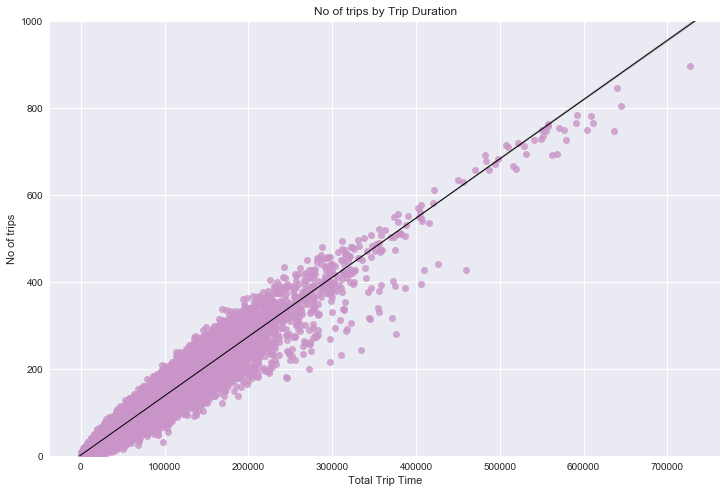

In [6]:
plt.figure(figsize=(12,8))
sns.regplot(y="no_of_trips", x="total_trip_time", data=df_daily_trips, fit_reg = True, color='#c994c7', line_kws={"linewidth": 1, "color": "black"})
plt.xlabel("Total Trip Time")
plt.ylabel("No of trips")
plt.title("No of trips by Trip Duration")
_ = plt.ylim(0,1000)

plt.show()

**There is a liner relatonship between number of trips and total trip duration for a given day/station but there are many outliers displayed here.
If we can remove outlier and correctly tune the model for preciting no fo trips, we will be easily able to predict the total trip duration also from same model. **


The distribution of trips is not normal without using the log. By using the log we can make the distribution modal normal distribution.

We can see that no of trips of crime is not evenly ditributed, without log function. one particular bin is way high in value and when we didnt use the log the high positive skew in the data couldn't be seen and rest are so relatively small that we cannot even notice them in chart. when we removed the log and plotted the histogram we can clearly see the skeweness in data distribution.

**To use linear regression, It is not Necessary for Y to be normally distributed.

Text(0.5,1,'No of trips by Station id')

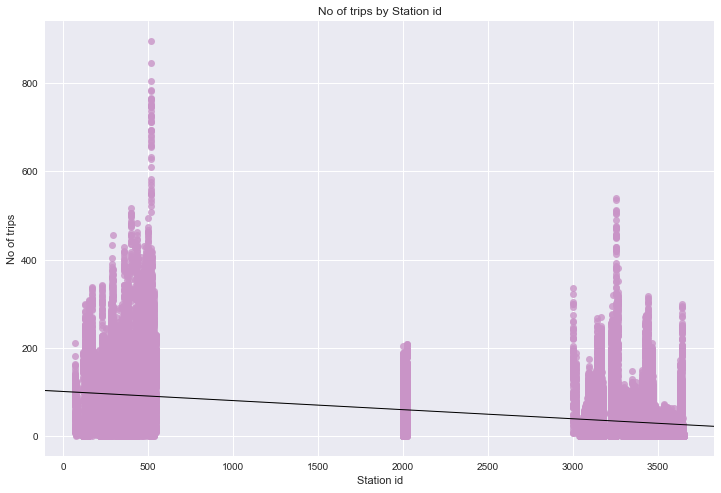

In [7]:
# Regression plot of Trip count againt Sttion id

plt.figure(figsize=(12,8))
sns.regplot(y="no_of_trips", x="start_id", data=df_daily_trips, fit_reg = True, color='#c994c7', line_kws={"linewidth": 1, "color": "black"})
plt.xlabel("Station id")
plt.ylabel("No of trips")
plt.title("No of trips by Station id")

Text(0.5,1,'No of trips by Median user age')

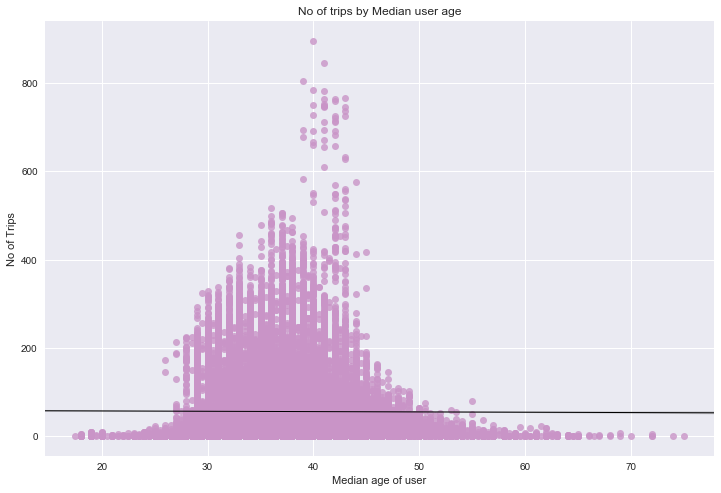

In [8]:
# Regression plot of Trip count againt median user Age

plt.figure(figsize=(12,8))
sns.regplot(y="no_of_trips", x="median_user_age", data=df_daily_trips, fit_reg = True, color='#c994c7', line_kws={"linewidth": 1, "color": "black"})
plt.xlabel("Median age of user")
plt.ylabel("No of Trips")
plt.title("No of trips by Median user age")


Text(0.5,1,'No of trips by Average daily Temp')

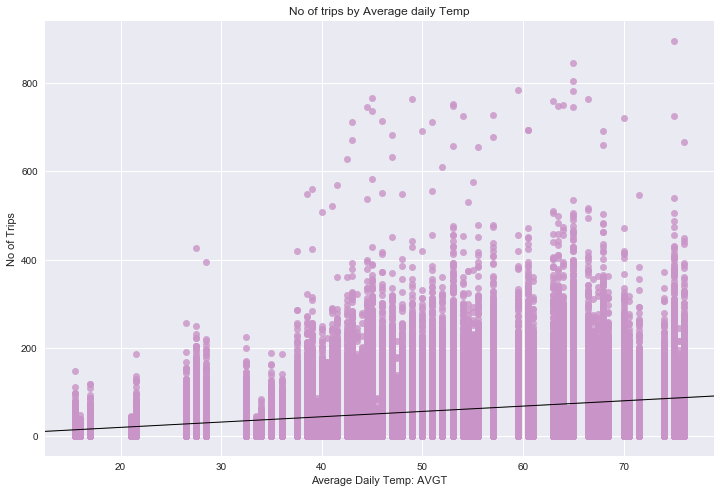

In [9]:
# Regression plot of Trip count againt Average temrature of the day

plt.figure(figsize=(12,8))
sns.regplot(y="no_of_trips", x="AVGT", data=df_daily_trips, fit_reg = True, color='#c994c7', line_kws={"linewidth": 1, "color": "black"})
plt.xlabel("Average Daily Temp: AVGT")
plt.ylabel("No of Trips")
plt.title("No of trips by Average daily Temp")


Text(0.5,1,'No of trips by Day of the week')

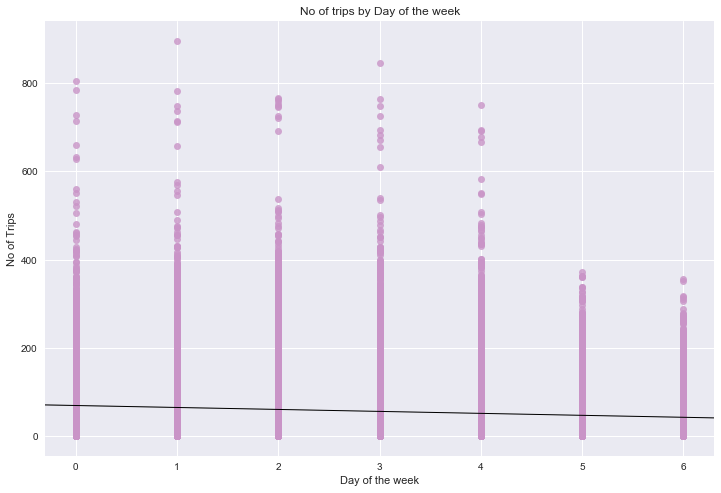

In [10]:
# Regression plot of Trip count againt Start Day temrature of the day

plt.figure(figsize=(12,8))
sns.regplot(y="no_of_trips", x="start_day", data=df_daily_trips, fit_reg = True, color='#c994c7', line_kws={"linewidth": 1, "color": "black"})
plt.xlabel("Day of the week")
plt.ylabel("tripduration log value")
plt.ylabel("No of Trips")
plt.title("No of trips by Day of the week")

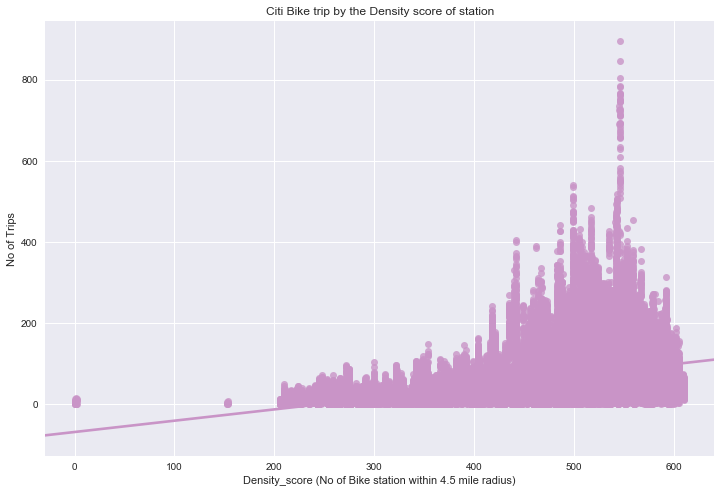

In [11]:
# Regression plot of Trip count againt Density Score
plt.figure(figsize=(12,8))

sns.regplot(x="density_score", y="no_of_trips", data=df_daily_trips, x_jitter=.3,  fit_reg = True, color='#c994c7');
_ = plt.xlabel('Density_score (No of Bike station within 4.5 mile radius)')
_ = plt.ylabel('No of Trips')
_ = plt.title('Citi Bike trip by the Density score of station')

plt.show()

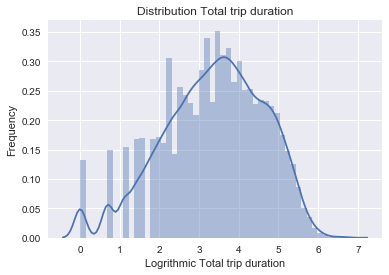

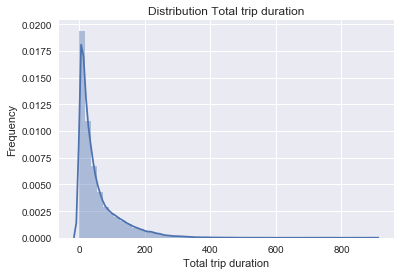

In [12]:
sns.distplot(np.log(df_daily_trips.no_of_trips));

plt.title("Distribution Total trip duration")
plt.xlabel("Logrithmic Total trip duration")
plt.ylabel("Frequency")
plt.show()

sns.distplot(df_daily_trips.no_of_trips);

plt.title("Distribution Total trip duration")
plt.xlabel("Total trip duration")
plt.ylabel("Frequency")
plt.show()

In [13]:

# use newdf3 Dataframe from above because we want to use Driver age as that is teh only quantitavie feature.

df_daily_trips.drop(['startdate'], axis=1, inplace=True)
df_daily_trips_new = df_daily_trips.drop(['total_trip_time', 'free_trip', 'paidunits', 'paidamount'], axis=1)

# use newdf3 Dataframe from above because we want to use Driver age as that is teh only quantitavie feature.

X = df_daily_trips_new.drop('no_of_trips', axis=1)
y = df_daily_trips_new.no_of_trips.values.reshape(-1,1)

# Split the dataframe in test and train Dataframes 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

X_train.reset_index(inplace=True)
#y_train = y_train.reset_index()

X_test.reset_index(inplace=True)
#y_test = y_test.reset_index()

print("Training set::{}{}".format(X_train.shape,y_train.shape))
print("Testing set::{}{}".format(X_test.shape, y_test.shape))

Training set::(46011, 10)(46011, 1)
Testing set::(19719, 10)(19719, 1)


Coefficients: 
 [[ -5.24634403e-06  -5.24634404e-06   2.60563007e-04   1.04291019e+00
    8.09638485e-02  -1.21889875e-02   1.48345307e-01  -8.77340196e-04
   -9.02197023e-03  -3.13720952e-05]]
Mean squared error: 4.00
Variance score: 1.00
Estimated intercept coefficient: [ 8.10781944]
Number of coefficients: 1
MAE train: 1.142, test: 1.155
MSE train: 3.547, test: 3.995
R^2 train: 0.999, test: 0.999


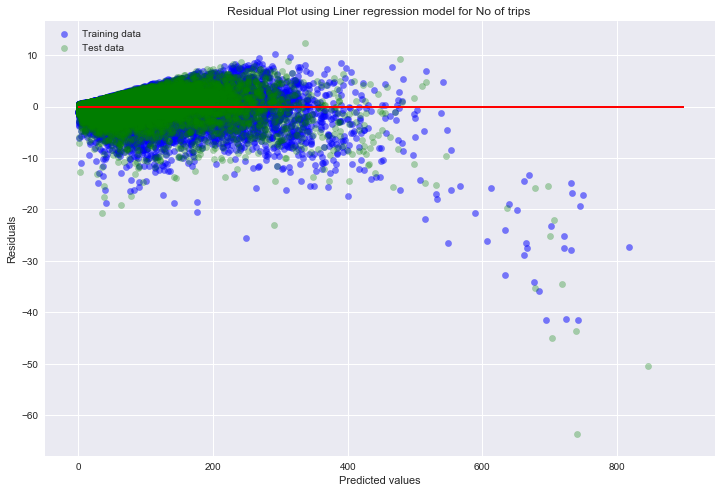

In [14]:
# Start LinearRegression

# Create the regressor: reg
reg = LinearRegression()

# Fit the model to the data
reg.fit(X_train, y_train)

# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(X_test)

# The coefficients
print('Coefficients: \n', reg.coef_)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

print('Estimated intercept coefficient: {}'.format(reg.intercept_))

print('Number of coefficients: {}'.format(len(reg.coef_)))

#print('predict score:', y_pred)

print('MAE train: %.3f, test: %.3f' % (
    mean_absolute_error(y_train, reg.predict(X_train)),
    mean_absolute_error(y_test, y_pred)))
print('MSE train: %.3f, test: %.3f' % (
    mean_squared_error(y_train, reg.predict(X_train)),
    mean_squared_error(y_test, y_pred)))
print('R^2 train: %.3f, test: %.3f' % (
    (r2_score(y_train, reg.predict(X_train)),
    r2_score(y_test, y_pred))))


# Plot the Residual of outputs
plt.figure(figsize=(12,8))

plt.scatter(reg.predict(X_train), reg.predict(X_train)-y_train, c='b', s=40, alpha = 0.5, label='Training data')
plt.scatter(y_pred, y_pred-y_test, c='g', s=40, alpha = 0.3, label='Test data')

plt.title("Residual Plot using Liner regression model for No of trips ")
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=0, xmax=900, lw=2, color='red')
plt.show()


In [15]:
# Compute 3-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg, X_test, y_test, cv=10)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))


[ 0.99920522  0.99918532  0.99918025  0.99918383  0.99925177  0.999265
  0.9988468   0.99892069  0.99895941  0.99929384]
Average 5-Fold CV Score: 0.9991292123054043


In [16]:
#Recursive feature elimination to repeatedly construct a model and choose either the best or worst performing feature
rfe = RFE(reg, 3)
fit = rfe.fit(X_test, y_test)

print("Num Features:", fit.n_features_)
print("Selected Features: ", fit.support_) 
print("Feature Ranking:", fit.ranking_)
print(sorted(zip(map(lambda x: round(x, 4), fit.ranking_), X.columns)))


Num Features: 3
Selected Features:  [False False False  True  True False  True False False False]
Feature Ranking: [8 7 5 1 1 2 1 4 3 6]
[(1, 'density_score'), (1, 'median_user_age'), (1, 'start_day'), (2, 'gender'), (3, 'Members'), (4, 'AVGT'), (5, 'no_of_bikes'), (7, 'start_id'), (8, 'Unnamed: 0')]


/Users/jitendra_agarwal/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(0.5,1,'No of trips vs Predicted No of Trips: $Y_i$ vs $\\hat{Y}_i$')

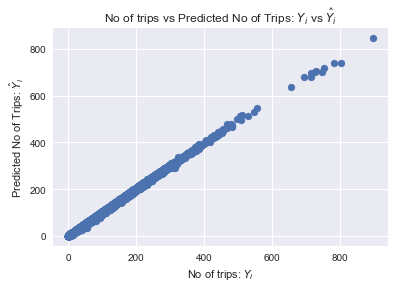

In [17]:
plt.scatter(y_test, y_pred)
plt.xlabel("No of trips: $Y_i$")
plt.ylabel("Predicted No of Trips: $\hat{Y}_i$")
plt.title("No of trips vs Predicted No of Trips: $Y_i$ vs $\hat{Y}_i$")


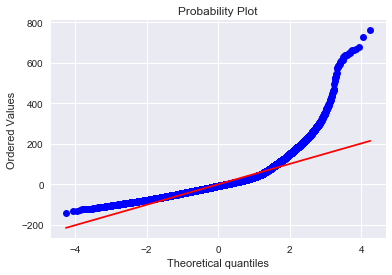

In [18]:

qq = probplot(df_daily_trips.no_of_trips - model2.fittedvalues, plot=plt)

Quantile Plot is a graph of the residuals versus the expected order statistics of the standard normal distribution. This graph plots quantiles of the data versus quantiles.

The q-q plot shows that there is a positive skewness in the residual data also. The residual shouldnt have positive or negative skewness. This is another violation of the assumption in the linear model.

So it looks like the Residual plot is better.


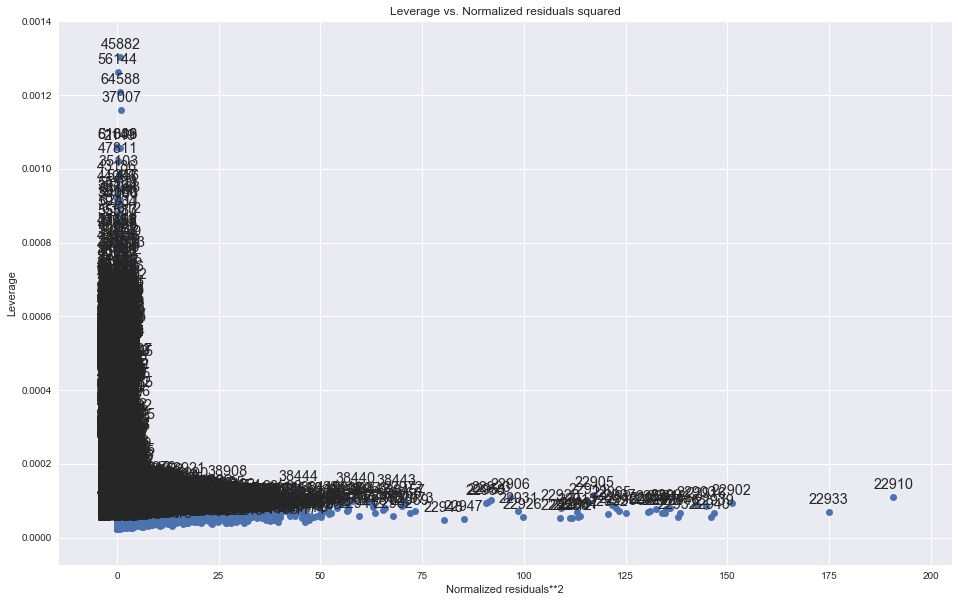

In [19]:
# Leverage Plot to see the level of deviations


fig, ax = plt.subplots(figsize=(16,10))
fig = plot_leverage_resid2(model2, ax=ax, alpha=0.7)

Leverage: An observation with an extreme value on a predictor variable is called a point with high leverage. Leverage is a measure of how far an observation deviates from the mean of that variable. These leverage points can have an effect on the estimate of regression coefficients.

In [20]:
#We will drop outlier and high influencer manually first

%matplotlib inline

outl_index = [37006, 38324, 6631, 3237, 20702, 27825, 38358, 24463, 3288, 59481, 37020, 51220, 16699, 22910, 22933, 22902, 37005, 22916
             , 22940, 22903, 22939, 22959, 59687, 456, 43251, 38436, 59688, 59826, 32057, 5784, 5875, 51252, 5872]
hl_index = [38324, 6631, 3237, 27825, 38358, 20702, 51220, 3288, 56144, 45882, 64588, 456, 43248, 48946, 5849]
out_hl_index = list(set(outl_index + hl_index))

cols = ["start_id", "median_user_age", "density_score" ,"start_day", "AVGT", "gender", "Members", "no_of_trips", "total_trip_time"]
df = df_daily_trips[cols]

outlier_df = df.iloc[outl_index]
hl_df = df.iloc[hl_index]
out_hl_df = df.iloc[out_hl_index]


# Outliers and high leverage putting together to check influence.

print(hl_df)
print(outlier_df)

df = df.drop(df.index[list(set(hl_index+outl_index))])

       start_id  median_user_age  density_score  start_day  AVGT  gender  \
38324      3249             28.5            343          0  75.0     1.0   
6631        303             35.0            545          4  76.0     1.0   
3237        244             38.0            448          4  44.0     2.0   
27825      3062             33.0            439          6  75.5     1.0   
38358      3249             31.5            343          6  40.5     1.0   
20702       487             32.0            588          4  76.0     1.0   
51220      3427             36.0            556          1  26.5     1.0   
3288        245             36.5            462          5  67.5     1.0   
56144      3512             74.0            362          3  47.0     2.0   
45882      3363             72.0            332          6  47.5     0.0   
64588      3620             70.0            516          1  46.0     2.0   
456         119             75.0            481          6  36.0     1.0   
43248      3

In [21]:
def reject_outliers_AVGT(data):
    u = np.mean(data.AVGT)
    s = np.std(data.AVGT)
    data_filtered = data[(data.AVGT > u-2*s) & (data.AVGT < u+2*s)]
    return pd.DataFrame(data_filtered)

def reject_outliers_DS(data):
    u = np.mean(data.density_score)
    s = np.std(data.density_score)
    data_filtered = data[(data.density_score > u-2*s) & (data.density_score < u+2*s)]
    return pd.DataFrame(data_filtered)

def reject_outliers_TTT(data):
    u = np.mean(data.total_trip_time)
    s = np.std(data.total_trip_time)
    data_filtered = data[(data.total_trip_time > u-2*s) & (data.total_trip_time < u+2*s)]
    return pd.DataFrame(data_filtered)

def reject_outliers_age(data):
    u = np.mean(data.median_user_age)
    s = np.std(data.median_user_age)
    data_filtered = data[(data.median_user_age > u-2*s) & (data.median_user_age < u+2*s)]
    return pd.DataFrame(data_filtered)

In [22]:
# best features  'density_score' , 'gender', 'median_user_age', 'start_day', 'AVGT'
print(df.shape)

new_df = reject_outliers_AVGT(df)

new_df1 = reject_outliers_DS(new_df)

new_df2 = reject_outliers_TTT(new_df1)

new_df3 = reject_outliers_age(new_df2)

print("new_shape", new_df3.shape)

(65691, 9)
new_shape (56597, 9)


In [23]:
#'Members', 'density_score', 'gender', 'median_user_age', 'start_day' , 'AVGT'

model3 = ols('no_of_trips ~ density_score + AVGT + start_day - 1', new_df3).fit()

print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:            no_of_trips   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                 2.943e+04
Date:                Sun, 18 Feb 2018   Prob (F-statistic):               0.00
Time:                        18:29:58   Log-Likelihood:            -2.9354e+05
No. Observations:               56597   AIC:                         5.871e+05
Df Residuals:                   56594   BIC:                         5.871e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
density_score     0.1284      0.001    100.925

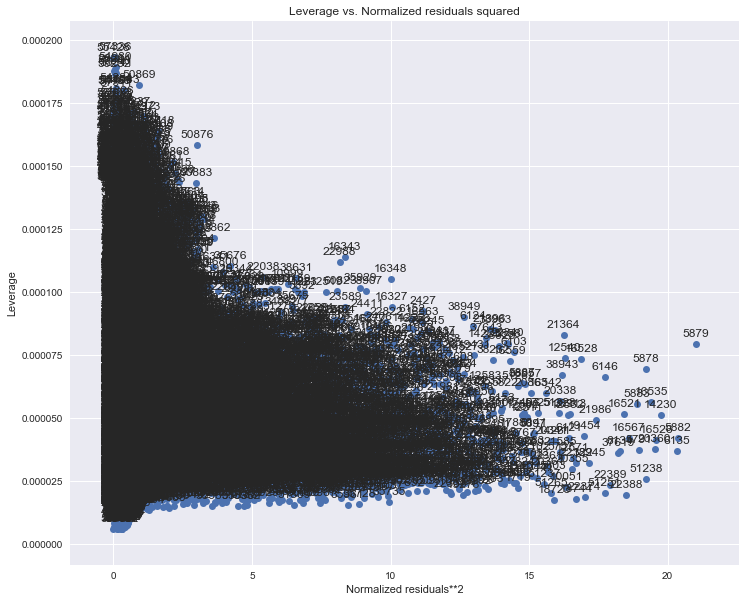

In [24]:
# Leverage Plot to see the level of deviations after tuning


fig, ax = plt.subplots(figsize=(12,10))
fig = plot_leverage_resid2(model3, ax=ax, alpha=0.7)

In [25]:

#new data frame with 'density_score', 'start_id', 'start_day', 'AVGT'

daily_trips_newdf1 = new_df3.drop(['total_trip_time', 'gender', 'Members','median_user_age'], axis=1)

X = daily_trips_newdf1.drop('no_of_trips', axis=1)
y = daily_trips_newdf1.no_of_trips.values.reshape(-1,1)

# Split the dataframe in test and train Dataframes 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=44)

#X_train.reset_index(inplace=True)
#y_train = y_train.reset_index()

#X_test.reset_index(inplace=True)
#y_test = y_test.reset_index()

print("Training set::{}{}".format(X_train.shape,y_train.shape))
print("Testing set::{}{}".format(X_test.shape, y_test.shape))


Training set::(37919, 4)(37919, 1)
Testing set::(18678, 4)(18678, 1)


In [26]:
# http://toddwschneider.com/posts/taxi-vs-citi-bike-nyc/

In [27]:

feature_list = list(X_train.columns)

ESTIMATORS = {
    "Decision Tree" : DecisionTreeRegressor(max_depth=10, min_samples_split=10, max_leaf_nodes=50),
    "Extra Trees" : ExtraTreesRegressor(n_estimators=10, max_features='auto'),
    "Gradient Boosting" : GradientBoostingRegressor(n_estimators=10, learning_rate=.05, loss='huber'),
    "Random Forest" : RandomForestRegressor(n_estimators = 10, oob_score = True)
}

y_test_predict = dict()
for name, estimator in ESTIMATORS.items():
    print(name)
    estimator.fit(X_train, y_train)
    print('MAE train: %.3f, test: %.3f' % (
    mean_absolute_error(y_train, estimator.predict(X_train)),
    mean_absolute_error(y_test, estimator.predict(X_test))))
    
    print('MSE train: %.3f, test: %.3f' % (
    mean_squared_error(y_train, estimator.predict(X_train)),
    mean_squared_error(y_test, estimator.predict(X_test))))
    
    print('R^2 train: %.3f, test: %.3f' % (
    (r2_score(y_train, estimator.predict(X_train)),
    r2_score(y_test, estimator.predict(X_test)))))
    

    # Get numerical feature importances
    importances = list(estimator.feature_importances_)
    # List of tuples with variable and importance
    feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
    # Sort the feature importances by most important first
    feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
    # Print out the feature and importances 
    [print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];


Decision Tree
MAE train: 21.847, test: 22.045
MSE train: 946.017, test: 980.080
R^2 train: 0.587, test: 0.576
Variable: start_id             Importance: 0.63
Variable: density_score        Importance: 0.21
Variable: AVGT                 Importance: 0.11
Variable: start_day            Importance: 0.06
Extra Trees


/Users/jitendra_agarwal/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


MAE train: 0.480, test: 12.696
MSE train: 6.456, test: 397.517
R^2 train: 0.997, test: 0.828
Variable: start_id             Importance: 0.5
Variable: density_score        Importance: 0.29
Variable: AVGT                 Importance: 0.14
Variable: start_day            Importance: 0.07
Gradient Boosting


/Users/jitendra_agarwal/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MAE train: 29.870, test: 29.904
MSE train: 1853.411, test: 1864.581
R^2 train: 0.190, test: 0.193
Variable: start_id             Importance: 0.7
Variable: density_score        Importance: 0.19
Variable: AVGT                 Importance: 0.07
Variable: start_day            Importance: 0.04
Random Forest


/Users/jitendra_agarwal/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/Users/jitendra_agarwal/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


MAE train: 4.476, test: 11.029
MSE train: 56.585, test: 299.673
R^2 train: 0.975, test: 0.870
Variable: start_id             Importance: 0.52
Variable: density_score        Importance: 0.26
Variable: AVGT                 Importance: 0.16
Variable: start_day            Importance: 0.07


In [28]:
                                        
# Models to try
models = {
    'RF': RandomForestRegressor( oob_score = True, max_features = 'auto'),
    'ETR': ExtraTreesRegressor( max_features='auto')
}

# Parameters to try (this is not an exahustive GridSearch)

params = {
    'RF': {'n_estimators' : [100, 1000],
            'max_depth': [9, 18],
            'min_samples_leaf': [1, 3],
            'max_features': [1.0, 0.3]},
    'ETR': {'n_estimators' : [100, 1000], 
            'max_depth': [9, 18],
            'min_samples_leaf': [1, 3],
            'max_features': [1.0, 0.3]}
}

In [29]:
class EstimatorSelectionHelper:
    
    """
    A helper class for running parameter grid search across different models. 
    It takes two dictionaries. The first contains the models to be scored. 
    The second contains the parameters for each model
    """
    
    def __init__(self, models, params):
        if not set(models.keys()).issubset(set(params.keys())):
            missing_params = list(set(models.keys()) - set(params.keys()))
            raise ValueError("Some estimators are missing parameters: %s" % missing_params)
        self.models = models
        self.params = params
        self.keys = models.keys()
        self.grid_searches = {}
    
    
    
    def fit(self, X, y, cv=3, n_jobs=1, verbose=1, scoring=None, refit=False): 
        """
        fit(X,y) method runs a parameter grid search with cross validation for each model
        and for the given training data. If scoring=None, the score method of the estimator is used.
        """
        for key in self.keys:
            print("Running GridSearchCV for %s." % key)
            model = self.models[key]
            params = self.params[key]
            gs = GridSearchCV(model, params, cv=cv, n_jobs=n_jobs, 
                              verbose=verbose, scoring=scoring, refit=refit)
            gs.fit(X,y)
            self.grid_searches[key] = gs 
            
    
    
    def score_summary(self, sort_by='mean_score'):
        """
        After calling fit(X,y), the score_summary() method returns a df with a summary of the scores
        """
        def row(key, scores, params):
            d = {
                 'estimator': key,
                 'min_score': min(scores),
                 'max_score': max(scores),
                 'mean_score': np.mean(scores),
                 'std_score': np.std(scores),
                }

            return pd.Series(dict(list( params.items()) + list(d.items() ))) #sum up two dicts
                      
        rows = [row(k, gsc.cv_validation_scores, gsc.parameters) 
                for k in self.keys
                for gsc in self.grid_searches[k].grid_scores_]
        df = pd.concat(rows, axis=1).T.sort_values([sort_by], ascending=False)
        
        columns = ['estimator', 'min_score', 'mean_score', 'max_score', 'std_score']
        columns = columns + [c for c in df.columns if c not in columns]
        
        return df[columns]

In [30]:
helper = EstimatorSelectionHelper(models, params)
helper.fit(X_train, y_train, n_jobs=-1)

Running GridSearchCV for RF.
Fitting 3 folds for each of 16 candidates, totalling 48 fits


/Users/jitendra_agarwal/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jitendra_agarwal/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jitendra_agarwal/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jitendra_agarwal/anaconda3/lib/python3.6/site-packages/sklearn/mod

/Users/jitendra_agarwal/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jitendra_agarwal/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jitendra_agarwal/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jitendra_agarwal/anaconda3/lib/python3.6/site-packages/sklearn/mod

Running GridSearchCV for ETR.
Fitting 3 folds for each of 16 candidates, totalling 48 fits


/Users/jitendra_agarwal/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jitendra_agarwal/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jitendra_agarwal/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jitendra_agarwal/anaconda3/lib/python3.6/site-packages/sklearn/mod

/Users/jitendra_agarwal/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jitendra_agarwal/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jitendra_agarwal/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jitendra_agarwal/anaconda3/lib/python3.6/site-packages/sklearn/mod

In [31]:
helper.score_summary()

/Users/jitendra_agarwal/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
/Users/jitendra_agarwal/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


,estimator,min_score,mean_score,max_score,std_score,max_depth,max_features,min_samples_leaf,n_estimators
9,RF,0.859008,0.861874,0.866032,0.00300958,18,1,1,1000
8,RF,0.857577,0.860469,0.864406,0.00288383,18,1,1,100
11,RF,0.852965,0.855502,0.859196,0.00267203,18,1,3,1000
10,RF,0.850953,0.853826,0.85799,0.00301454,18,1,3,100
25,ETR,0.82284,0.825402,0.82821,0.00219934,18,1,1,1000
24,ETR,0.821279,0.824213,0.827654,0.00262719,18,1,1,100
26,ETR,0.81741,0.819269,0.822153,0.00206747,18,1,3,100
27,ETR,0.815826,0.818904,0.820802,0.00219596,18,1,3,1000
13,RF,0.723001,0.729471,0.733558,0.00462769,18,0.3,1,1000
12,RF,0.718329,0.723217,0.729665,0.00475781,18,0.3,1,100


In [32]:
reg =  RandomForestRegressor(n_estimators = 100, oob_score = True, random_state =42, 
                            max_depth = 18, min_samples_leaf=1, max_features = 'auto')

reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

print('MAE train: %.3f, test: %.3f' % (
mean_absolute_error(y_train, reg.predict(X_train)),
mean_absolute_error(y_test, y_pred)))

print('MSE train: %.3f, test: %.3f' % (
mean_squared_error(y_train, reg.predict(X_train)),
mean_squared_error(y_test, y_pred)))

print('R^2 train: %.3f, test: %.3f' % (
(r2_score(y_train, reg.predict(X_train)),
r2_score(y_test, y_pred))))


/Users/jitendra_agarwal/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


MAE train: 5.453, test: 10.649
MSE train: 72.672, test: 281.057
R^2 train: 0.968, test: 0.878


In [33]:
def rmsle(y_test, y_pred):
    assert len(y_test) == len(y_pred)
    return np.sqrt(np.mean(np.power(np.log1p(y_test)-np.log1p(y_pred), 2)))

In [34]:

print("RMSE : Root mean Square value",np.sqrt(mean_squared_error(y_test, y_pred)))
print("RMSLE : Root mean Square log value",rmsle(y_test, y_pred))
print("NMSLE : Naturalized mean Square value", np.sqrt(mean_squared_error(y_test, y_pred))/(max(y_test)-min(y_test)))


RMSE : Root mean Square value 16.7647604652
RMSLE : Root mean Square log value 1.4459402223
NMSLE : Naturalized mean Square value [ 0.06787352]
